In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
np.random.seed(0)

## Data Construction

We simulated a binary dataset consisting of a 1000 data points, the dataset follows a simple linear function $f(x)=mx + c$ where the x is generated randomly from a uniform distribution between $0$ and $1$ and a corresponding y value is calculated with added gaussian noise of mean $\mu=0$ and standard deviation $\sigma=0.25$. Since this dataset is simulated probabilistically by construction the X value of each data point is the probability of that point belonging to class 1.

In [2]:
def f(x):
    return 2*x + 1

x=np.random.uniform(0,1,10000)


x0 = []
y0 = []

x1 = []
y1 = []

Y1=np.zeros(len(x))

X1=np.zeros((len(x),2))


for i in range(len(x)):

    
    if np.random.random() < x[i]:
        x0.append(x[i])
        y0.append( f(x[i]) + np.random.normal(0,0.25)  )

        
    else:
        x1.append(x[i])
        y1.append( f(x[i]) + np.random.normal(0,0.25) ) 
    

'''plt.rcParams.update({'font.size': 18})
        
plt.figure(figsize=(10,8))
plt.scatter(x0,y0,marker='*',s=20,facecolors='none',edgecolors='r',alpha=0.3,label='class0')
plt.scatter(x1,y1,marker='o',s=20,facecolors='none',edgecolors='b',alpha=0.2,label='class1') # class 1
plt.axvline(0.1,color='blue')
plt.axvline(0.5,color='magenta')
plt.axvline(0.9,color='red')
plt.text(0.1,2.5,s='Pr(x=class0)=0.9 ' + '\n' + 'Pr(x=class1)=0.1 ' )
plt.text(0.5,3,s='Pr(x=class0)=0.5 ' + '\n' + 'Pr(x=class1)=0.5 ' )
plt.text(0.9,1,s='Pr(x=class0)=0.1 ' + '\n' + 'Pr(x=class1)=0.9 ' )
plt.legend()
plt.savefig('simulated.png')
plt.show()

'''


"plt.rcParams.update({'font.size': 18})\n        \nplt.figure(figsize=(10,8))\nplt.scatter(x0,y0,marker='*',s=20,facecolors='none',edgecolors='r',alpha=0.3,label='class0')\nplt.scatter(x1,y1,marker='o',s=20,facecolors='none',edgecolors='b',alpha=0.2,label='class1') # class 1\nplt.axvline(0.1,color='blue')\nplt.axvline(0.5,color='magenta')\nplt.axvline(0.9,color='red')\nplt.text(0.1,2.5,s='Pr(x=class0)=0.9 ' + '\n' + 'Pr(x=class1)=0.1 ' )\nplt.text(0.5,3,s='Pr(x=class0)=0.5 ' + '\n' + 'Pr(x=class1)=0.5 ' )\nplt.text(0.9,1,s='Pr(x=class0)=0.1 ' + '\n' + 'Pr(x=class1)=0.9 ' )\nplt.legend()\nplt.savefig('simulated.png')\nplt.show()\n\n"

## Rescaling, reshaping and splitting the data for use in the neural network in training and testting

In [3]:
Y1=np.zeros(len(x0))
Y2=np.ones(len(x1))

Y=np.concatenate((Y1, Y2), axis=0)

x=np.concatenate((x0, x1), axis=0)
y=np.concatenate((y0, y1), axis=0)

X=np.stack((x, y), axis=-1)


X = np.asarray(X)
Y = np.asarray(Y)

#X = scale(X)
X = X.astype(float)
Y = Y.astype(float)

X.shape , Y.shape

((10000, 2), (10000,))

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)

type(Y_train[0])

numpy.float64

## Building a neural betwork using a multi-layer perceptron from SKlearn called the MLPClassifier

Network architecture :
- input layer with 2 neurons
- 2 hidden layers with 5 neurons
- 1 output layer (softmax)

<img src="architecture.png">


We look to observe the reliability curve of the MLPClassifier

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
%matplotlib inline

In [22]:
def reliability_curve(y_true, y_score, bins=10, normalize=False):

  
    if normalize:  # Normalize scores into bin [0, 1]
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())

    bin_width = 1.0 / bins
    bin_centers = np.linspace(0, 1.0 - bin_width, bins) + bin_width / 2

    y_score_bin_mean = np.empty(bins)
    empirical_prob_pos = np.empty(bins)
    for i, threshold in enumerate(bin_centers):
        # determine all samples where y_score falls into the i-th bin
        bin_idx = np.logical_and(threshold - bin_width / 2 < y_score,
                                 y_score <= threshold + bin_width / 2)
        # Store mean y_score and mean empirical probability of positive class
        y_score_bin_mean[i] = y_score[bin_idx].mean()
        empirical_prob_pos[i] = y_true[bin_idx].mean()
    return y_score_bin_mean, empirical_prob_pos

In [23]:
reliability_scores = {}
y_score = {}
predicted_lists=[]
prednan=[]
for i in range(25):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, shuffle=True)
    scaler = StandardScaler()
    scaler.fit(X_train)


    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    clf = MLPClassifier(solver='sgd',alpha=1e-5,hidden_layer_sizes=(5,5),random_state=1)

    clf.fit(X_train,Y_train)
    
    
    y_score['MLP classifier'] = clf.predict_proba(X_test)[:,1]
    reliability_scores['MLP classifier']=\
    reliability_curve(Y_test , y_score['MLP classifier'], bins=25 , normalize=False)
    
    
    arr=reliability_scores['MLP classifier'][0]
    scores_not_nan = np.logical_not(np.isnan(arr))
    predic_notnan=arr[scores_not_nan]
    prednan.append(arr)
    predicted_lists.append(predic_notnan)




/usr/lib/python3/dist-packages/ipykernel/__main__.py:67: RuntimeWarning: Mean of empty slice.
/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/ipykernel/__main__.py:68: RuntimeWarning: Mean of empty slice.
/usr/lib/python3/dist-packages/ipykernel/__main__.py:67: RuntimeWarning: Mean of empty slice.
/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/ipykernel/__main__.py:68: RuntimeWarning: Mean of empty slice.
/usr/lib/python3/dist-packages/ipykernel/__main__.py:67: RuntimeWarning: Mean of empty slice.
/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib

In [94]:
import pandas as pd
stderrors=[]
for i in range(len(prednan)):
    place=[]
    place=[t[i] for t in prednan]
    DF=pd.DataFrame({'vals':place})

    DF.dropna(inplace=True)
   
    stderrors.append(np.std(DF['vals'].values))
YERR=np.asarray(stderrors)

/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [95]:
YERR

array([       nan,        nan, 0.00220125, 0.00067039, 0.00089235,
       0.00082339, 0.0009847 , 0.00122236, 0.00090857, 0.00106452,
       0.00092005, 0.00138203, 0.00116445, 0.00143317, 0.00105832,
       0.00131783, 0.00100562, 0.00088537, 0.00089853, 0.00123377,
       0.00092965, 0.00073487, 0.0006715 , 0.00113574, 0.00085148])

In [65]:
'''import pandas as pd
stderrors=[]
for i in range(len(prednan)):
    place=[]
    place=[t[i] for t in prednan]
    std_hold=np.std(place)
    stderrors.append(std_hold)
'''


'import pandas as pd\nstderrors=[]\nfor i in range(len(prednan)):\n    place=[]\n    place=[t[i] for t in prednan]\n    std_hold=np.std(place)\n    stderrors.append(std_hold)\n'

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)
scaler = StandardScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

bins=25

reliability_scores = {}
y_score = {}
clf = MLPClassifier(solver='sgd',alpha=1e-5,hidden_layer_sizes=(5,5),random_state=1)


clf.fit(X_train,Y_train)
pred=clf.predict(X_test)


y_score['MLP classifier'] = clf.predict_proba(X_test)[:,1]
reliability_scores['MLP classifier']=\
reliability_curve(Y_test , y_score['MLP classifier'], bins=bins , normalize=False)



/usr/lib/python3/dist-packages/ipykernel/__main__.py:67: RuntimeWarning: Mean of empty slice.
/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/ipykernel/__main__.py:68: RuntimeWarning: Mean of empty slice.


	Accuracy: 0.744
	Precision: 0.747
	Recall: 0.735
	F1: 0.741



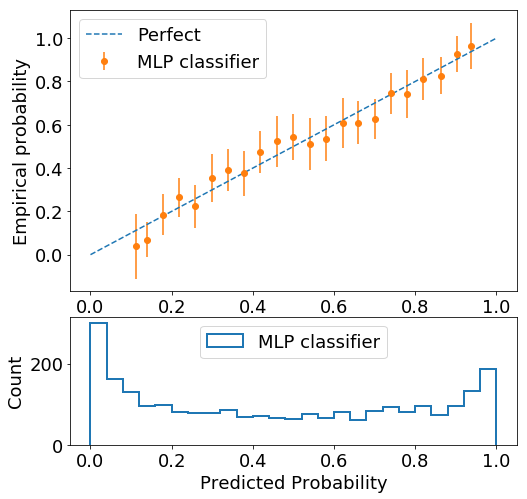

In [92]:
plt.figure(0, figsize=(8, 8))
plt.rcParams.update({'font.size': 18})
plt.subplot2grid((3, 1), (0, 0), rowspan=2)
plt.plot([0.0, 1.0], [0.0, 1.0] ,'--', label="Perfect")
for method, (y_score_bin_mean, empirical_prob_pos) in reliability_scores.items():
    scores_not_nan = np.logical_not(np.isnan(empirical_prob_pos))
    
    plt.errorbar(y_score_bin_mean[scores_not_nan],
             empirical_prob_pos[scores_not_nan], yerr=YERR[scores_not_nan] ,fmt='o',label=method)
plt.ylabel("Empirical probability")
plt.legend(loc=0)

plt.subplot2grid((3, 1), (2, 0))
for method, y_score_ in y_score.items():
    
    y_score_ = (y_score_ - y_score_.min()) / (y_score_.max() - y_score_.min())
    plt.hist(y_score_, range=(0, 1), bins=bins ,label=method,
             histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.savefig('reliabilityMLP.png')
plt.legend(loc='upper center', ncol=2)


print("\tAccuracy: %1.3f"%clf.score(X_test, Y_test))
print("\tPrecision: %1.3f" % precision_score(Y_test, pred))
print("\tRecall: %1.3f" % recall_score(Y_test, pred))
print("\tF1: %1.3f\n" % f1_score(Y_test, pred))

	Accuracy: 0.744
	Precision: 0.747
	Recall: 0.735
	F1: 0.741



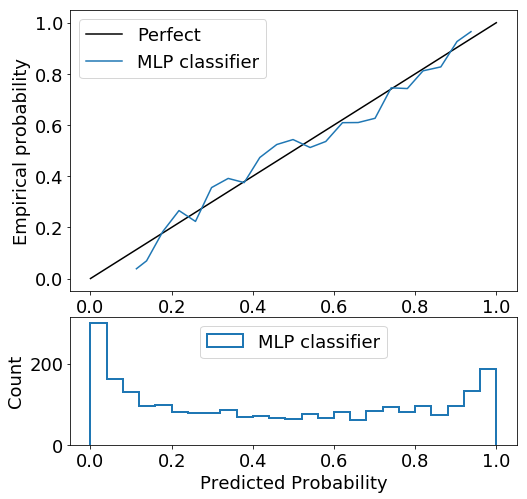

In [96]:
plt.figure(0, figsize=(8, 8))
plt.rcParams.update({'font.size': 18})
plt.subplot2grid((3, 1), (0, 0), rowspan=2)
plt.plot([0.0, 1.0], [0.0, 1.0],'k', label="Perfect")
for method, (y_score_bin_mean, empirical_prob_pos) in reliability_scores.items():
    scores_not_nan = np.logical_not(np.isnan(empirical_prob_pos))
    plt.plot(y_score_bin_mean[scores_not_nan],
             empirical_prob_pos[scores_not_nan], label=method)
plt.ylabel("Empirical probability")
plt.legend(loc=0)

plt.subplot2grid((3, 1), (2, 0))
for method, y_score_ in y_score.items():
    y_score_ = (y_score_ - y_score_.min()) / (y_score_.max() - y_score_.min())
    plt.hist(y_score_, range=(0, 1), bins=bins, label=method,
             histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.savefig('reliabilityMLP.png')
plt.legend(loc='upper center', ncol=2)


print("\tAccuracy: %1.3f"%clf.score(X_test, Y_test))
print("\tPrecision: %1.3f" % precision_score(Y_test, pred))
print("\tRecall: %1.3f" % recall_score(Y_test, pred))
print("\tF1: %1.3f\n" % f1_score(Y_test, pred))

## Now we make the plot where we compare our x vaules which by construction is our real probabilities of any point belonging to class 1 to the predicted probabilities


In [12]:
Pred_prob=clf.predict_proba(X_test)

X_true=scaler.inverse_transform(X_test, copy=None)

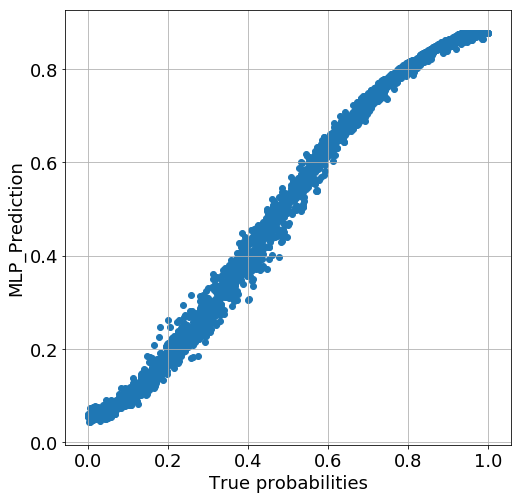

In [13]:
plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 18})
plt.scatter(X_true[:,0],Pred_prob[:,0])
plt.ylabel('MLP_Prediction')
plt.xlabel('True probabilities')
plt.grid()
plt.savefig('predbMLP.png')
plt.show()

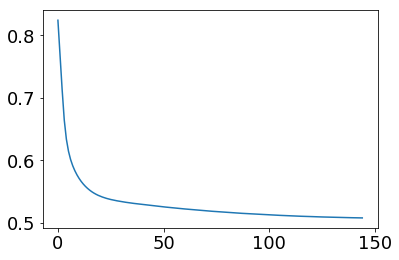

In [14]:
plt.plot(clf.loss_curve_)
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,pred)

array([[960, 290],
       [325, 925]])

In [16]:
confusion_matrix(Y_test,pred)

array([[960, 290],
       [325, 925]])